<a href="https://colab.research.google.com/github/bayuryunarko/belajar-sklearn/blob/main/2_K_Nearest_Neighbours.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Latihan SKLearn dari channel Youtube "Indonesia Belajar"

##Klasifikasi dengan KNN (K-Nearest Neighbours)

- KNN adalah model machine learning yang dapat digunakan untuk melakukan prediksi berdasarkan kedekatan karakteristik dengan sejumlah tetangga terdekat
- Prediksi yang dilakukan dapat diterapkan baik pada klasifikasi maupun soal regresi

##Sample Dataset

In [1]:
import pandas as pd

sensus = {
    'tinggi' : [158, 170, 183, 191, 155, 163, 180, 158, 178],
    'berat' : [64, 86, 84, 80, 49, 59, 67, 54, 67],
    'jk' : ['pria', 'pria', 'pria', 'pria', 'wanita', 'wanita', 'wanita', 'wanita', 'wanita']
}

sensus_df = pd.DataFrame(sensus)
sensus_df

,tinggi,berat,jk
0,158,64,pria
1,170,86,pria
2,183,84,pria
3,191,80,pria
4,155,49,wanita
5,163,59,wanita
6,180,67,wanita
7,158,54,wanita
8,178,67,wanita


##Visualisasi Data

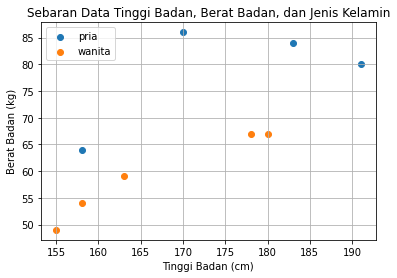

In [2]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
for jk, d in sensus_df.groupby('jk'):
  ax.scatter(d['tinggi'], d['berat'], label=jk)

plt.legend(loc='upper left')
plt.title('Sebaran Data Tinggi Badan, Berat Badan, dan Jenis Kelamin')
plt.xlabel('Tinggi Badan (cm)')
plt.ylabel('Berat Badan (kg)')
plt.grid(True)
plt.show()

##Preprocessing Dataset

In [3]:
import numpy as np

X_train = np.array(sensus_df[['tinggi', 'berat']])
y_train = np.array(sensus_df['jk'])

print(f'X_train: \n{X_train}\n')
print(f'y_train: {y_train}')

X_train: 
[[158  64]
 [170  86]
 [183  84]
 [191  80]
 [155  49]
 [163  59]
 [180  67]
 [158  54]
 [178  67]]

y_train: ['pria' 'pria' 'pria' 'pria' 'wanita' 'wanita' 'wanita' 'wanita' 'wanita']


In [4]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
print(f'y_train: {y_train}')

y_train: [[0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]]


In [5]:
y_train = y_train.flatten()
print(f'y_train: {y_train}')

y_train: [0 0 0 0 1 1 1 1 1]


##Training KNN Classification Model

In [6]:
from sklearn.neighbors import KNeighborsClassifier

K= 3
model = KNeighborsClassifier(n_neighbors=K)
model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

##Prediksi Jenis Kelamin

In [7]:
tinggi_badan = 155
berat_badan = 70
X_new = np.array([tinggi_badan, berat_badan]).reshape(1,-1)
X_new

array([[155,  70]])

In [8]:
y_new = model.predict(X_new)
y_new

array([1])

In [9]:
lb.inverse_transform(y_new)

array(['wanita'], dtype='<U6')

##Visualisasi Nearest Neighbours

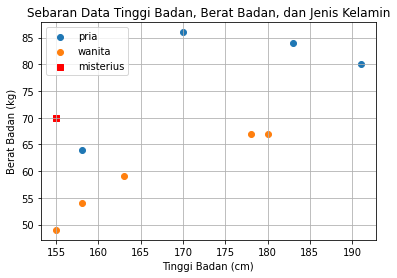

In [10]:
fig, ax = plt.subplots()
for jk, d in sensus_df.groupby('jk'):
  ax.scatter(d['tinggi'], d['berat'], label=jk)

plt.scatter(tinggi_badan,
            berat_badan,
            marker='s',
            color='red',
            label='misterius')

plt.legend(loc='upper left')
plt.title('Sebaran Data Tinggi Badan, Berat Badan, dan Jenis Kelamin')
plt.xlabel('Tinggi Badan (cm)')
plt.ylabel('Berat Badan (kg)')
plt.grid(True)
plt.show()

##Kalkulasi Distance (Euclidean Distance)

In [11]:
misterius = np.array([tinggi_badan, berat_badan])
misterius

array([155,  70])

In [12]:
X_train

array([[158,  64],
       [170,  86],
       [183,  84],
       [191,  80],
       [155,  49],
       [163,  59],
       [180,  67],
       [158,  54],
       [178,  67]])

In [14]:
from scipy.spatial.distance import euclidean

data_jarak = [euclidean(misterius, d) for d in X_train]
data_jarak

[6.708203932499369,
 21.93171219946131,
 31.304951684997057,
 37.36308338453881,
 21.0,
 13.601470508735444,
 25.179356624028344,
 16.278820596099706,
 23.194827009486403]

In [15]:
sensus_df['jarak'] = data_jarak
sensus_df.sort_values(['jarak'])

,tinggi,berat,jk,jarak
0,158,64,pria,6.708204
5,163,59,wanita,13.601471
7,158,54,wanita,16.278821
4,155,49,wanita,21.000000
1,170,86,pria,21.931712
8,178,67,wanita,23.194827
6,180,67,wanita,25.179357
2,183,84,pria,31.304952
3,191,80,pria,37.363083


##Evaluasi KNN Classification Model

###Testing Set

In [16]:
X_test = np.array([[168, 65], [180, 96], [160,52], [169,67]])
y_test = lb.transform(np.array(['pria', 'pria', 'wanita', 'wanita'])).flatten()

print(f'X_test: \n{X_test}\n')
print(f'y_test: {y_test}')

X_test: 
[[168  65]
 [180  96]
 [160  52]
 [169  67]]

y_test: [0 0 1 1]


###Prediksi Terhadap Testing Set

In [17]:
y_predict = model.predict(X_test)
y_predict

array([1, 0, 1, 1])

###Accuracy

Accuracy is the proportion of test instances that were classified correctly

In [18]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, y_predict)

print(f'Accuracy Score : {acc}')

Accuracy Score : 0.75


###Precission

Precission is the proportion of test instances that were predicted to be positive that are truly positive

In [19]:
from sklearn.metrics import precision_score

pre = precision_score(y_test, y_predict)

print(f'Precission Score : {pre}')

Precission Score : 0.6666666666666666


###Recall

Recall is the proportion of truly positive test instances that were predicted to be positive

In [20]:
from sklearn.metrics import recall_score

rec = recall_score(y_test, y_predict)

print(f'Recall Score : {pre}')

Recall Score : 0.6666666666666666


###F1 Score

The F1 score is the harmonic mean of precission and recall

In [21]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_predict)

print(f'F1 Score : {f1}')

F1 Score : 0.8


###Classification Report

In [23]:
from sklearn.metrics import classification_report

cla_rep = classification_report(y_test, y_predict)

print(f'Classification Report : \n{cla_rep}')

Classification Report : 
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.67      1.00      0.80         2

    accuracy                           0.75         4
   macro avg       0.83      0.75      0.73         4
weighted avg       0.83      0.75      0.73         4



###Matthews Correlation Coefficient (MCC)

- MCC is an alternative to the F1 score for measuring the performance of binary classifier
- A prefect classifier's MCC is 1
- A trivial classifier that predict randomly will score 0, and perferctly wrong classifier will score -1

In [24]:
from sklearn.metrics import matthews_corrcoef

mcc = matthews_corrcoef(y_test, y_predict)

print(f'Classification Report : \n{mcc}')

Classification Report : 
0.5773502691896258


-----